In [ ]:
!unzip Cat.zip
!mv ResizedCat Cat

In [ ]:
!unzip Dog.zip
!mv ResizedDog Dog

In [ ]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn

In [ ]:
!pip install tensorflow

In [7]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

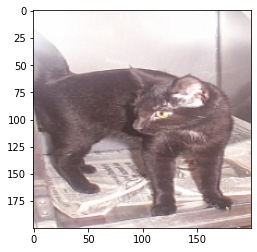

In [10]:
# Sample a cat image
sample_cat = mpimg.imread('Cat/image3814.jpg')
plt.imshow(sample_cat)
plt.show()

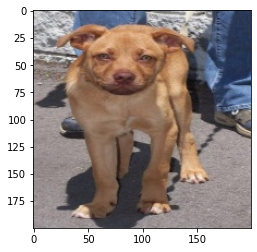

In [11]:
# Sample a dog image
sample_dog = mpimg.imread('Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [13]:
# Count total images
data_dir = pathlib.Path('./Pets')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

24946

In [15]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WITDH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32

#etiqueda todas las imagenes dentro de una carpeta, con el nombre de la carpeta
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #tamaño de la muestra
  subset="training",
  seed=123,
  image_size=(200, 200), #tamaño
  batch_size=32) #lote

Found 24946 files belonging to 2 classes.
Using 19957 files for training.


In [16]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 200),
  batch_size=32)
  #El archivo de validacion va a hacer el tunning de la red neuronal

Found 24946 files belonging to 2 classes.
Using 4989 files for validation.


In [17]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [18]:
# Create the deep learning architecture

IMAGE_CHANNELS=3 #las imanges a color tienen 3 canales RGB
IMAGE_WIDTH=200
IMAGE_HEIGHT=200

model = Sequential([

#capa de convolucion primer argumento Kernel Size 32 // el segundo (3,3) stride es una tupla de a cuanto bloques ir saltando
# stride debe ser impares (5,5) o  (7,7) 
# relu es la funcion de activacion hay otras como (sigmoid o tanh)
Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)), #convolucion 
BatchNormalization(), #normalizacion trata de llevalo a un rango de valores para que datos muy chicos o muy grande no interfieran
MaxPooling2D(pool_size=(2, 2)), #tomo el maximo
Dropout(0.25), # tecnica para que la red neuronal no se aprenda de memoria la estructura de los datos anulo neuronas

#capa de convolucion
Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

#capa de convolucion
Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(), # toma la mtriz cuadrada y la estira como si fuera una linea o una columna como si fuera regresion lineal
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes (porque la sismoide da 0 o 1)
])

#compila el modelo y en la funcion de perdida uso binary_crossentropy po
# optimizer adam (hay otros)
# metricas accuracy (proporcion de prediciones correctas sobre el total )
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [20]:
# Fit the model
# con el modelo pronto hago el entrenamiento
# primero le doy el dataset de aprendizaje
# luego le doy el archivo de validacion
# epochs son la cantidad de pasadas de aprendizaje, se varia hasta que el modelo no mejore más
# corre cada epochs por lote
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
 16/624 [..............................] - ETA: 10:33 - loss: 0.3070 - accuracy: 0.8613

KeyboardInterrupt: 

In [ ]:
model.save('final_model.h5')

In [21]:
def load_img(filename):
    img = cv2.imread(filename)
    try:
        img_resized = cv2.resize(img,(200,200))
    except:
        print(f'Error in image {img}')
    return img_resized

In [ ]:
from keras.preprocessing import image
img = image.load_img("sample_image.jpg",target_size=(200,200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("final_model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')